# DFNN model applied in Cylinder Inverse Design

## Code

### Import libary and helper fctn

In [14]:
%matplotlib notebook
import os
import sys
sys.path.append("numpy_path")
import numpy as np
import struct
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import keras.callbacks as cb
from keras.callbacks import EarlyStopping, ModelCheckpoint
from mpl_toolkits import mplot3d

# define loss history
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

#plot losses
def plot_losses(losses):
    plt.plot(losses)
    plt.title('Loss per batch')
    plt.show()

def feature_scaling(X):
    X = X.T
    for i in range(7):
        mean = X[i].mean()
        std = X[i].std()
        X[i] = [(x - mean)/std for x in X[i]]
    return X.T

# input dimension
DIM = 83

def init_model():
    model = Sequential()
    model.add(Dense(10, input_dim=dim))
    #model.add(Dropout(0.9))   # dropouot actually is bad in this case
    model.add(Activation('relu'))
    model.add(Dense(20))
    #model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    # use mean squared error to measure the looses
    model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr = 0.001),
              metrics=['accuracy'])
    return model

In [15]:
# get data from the source
raw_data = np.genfromtxt('C:/Users/jeffe/Desktop/Summer_research/S4_code/data/DATA3-5_#17.txt')
raw_data_size = len(raw_data)
# we only need two type of data transmission and its according transmission
# initialize a 2D array (len(raw_data), 2) with all zeros
flat_X = np.zeros((raw_data_size, 1))
# calculate transmission
# formula: a**2 + b**2
for i in range(raw_data_size):
    flat_X[i, 0] = raw_data[i, 1]**2 + raw_data[i, 2]**2
# learn from 83 equally seperated points from spectrum
X = np.reshape(flat_X[:, -1], (raw_data_size // DIM, DIM))
data_size = len(X)


In [17]:
X.shape

(17, 83)

### Processing data

In [31]:
# get data from the source
raw_data = np.genfromtxt('C:/Users/jeffe/Desktop/Summer_research/cylinder/Data_r_freq.txt')
data_size = len(raw_data)
# we only need two type of data transmission and its according transmission
# initialize a 2D array (len(raw_data), 2) with all zeros
all_d = np.zeros((data_size, 2))

# calculate transmission
# formula: a**2 + b**2
for i in range(len(raw_data)):
    all_d[i, 0] = raw_data[i, 0]
    all_d[i, 1] = raw_data[i, 2]**2 + raw_data[i, 3]**2

# learn from 83 equally seperated points from spectrum
x = np.reshape(all_d[:, -1], (data_size // DIM, DIM))

y_processed = []
for i in range(0, len(y), 50):
    y_processed.append(y[i])
y_processed = np.array(y_processed)

# In the original data, different spectrum was generated as radius of the cylinder increases
# We shuffled the data and ensure there's no sequence in the training or testing data
shuffled_data = np.append(y_processed, x, axis = 1)
np.random.shuffle(shuffled_data)

# extract x and y from the shuffled data
x = np.reshape(shuffled_data[:, 1:], (41, 50))
y_processed = np.reshape(shuffled_data[:, 0], (41, 1))
keras.utils.normalize(x)

train_x = x[0:30, :]
train_y = y_processed[0:30]
test_x = x[31:41, :]
test_y = y_processed[31:41]

### Training

Train on 30 samples, validate on 10 samples
Epoch 1/500
 - 0s - loss: 0.0810 - acc: 0.0000e+00 - val_loss: 0.0744 - val_acc: 0.0000e+00
Epoch 2/500
 - 0s - loss: 0.0680 - acc: 0.0000e+00 - val_loss: 0.0622 - val_acc: 0.0000e+00
Epoch 3/500
 - 0s - loss: 0.0551 - acc: 0.0000e+00 - val_loss: 0.0504 - val_acc: 0.0000e+00
Epoch 4/500
 - 0s - loss: 0.0434 - acc: 0.0000e+00 - val_loss: 0.0359 - val_acc: 0.0000e+00
Epoch 5/500
 - 0s - loss: 0.0297 - acc: 0.0000e+00 - val_loss: 0.0249 - val_acc: 0.0000e+00
Epoch 6/500
 - 0s - loss: 0.0208 - acc: 0.0000e+00 - val_loss: 0.0177 - val_acc: 0.0000e+00
Epoch 7/500
 - 0s - loss: 0.0148 - acc: 0.0000e+00 - val_loss: 0.0132 - val_acc: 0.0000e+00
Epoch 8/500
 - 0s - loss: 0.0116 - acc: 0.0000e+00 - val_loss: 0.0105 - val_acc: 0.0000e+00
Epoch 9/500
 - 0s - loss: 0.0096 - acc: 0.0000e+00 - val_loss: 0.0091 - val_acc: 0.0000e+00
Epoch 10/500
 - 0s - loss: 0.0085 - acc: 0.0000e+00 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 11/500
 - 0s - loss: 0.0083 -

Epoch 89/500
 - 0s - loss: 0.0056 - acc: 0.0000e+00 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 90/500
 - 0s - loss: 0.0056 - acc: 0.0000e+00 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 91/500
 - 0s - loss: 0.0056 - acc: 0.0000e+00 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 92/500
 - 0s - loss: 0.0056 - acc: 0.0000e+00 - val_loss: 0.0074 - val_acc: 0.0000e+00
Epoch 93/500
 - 0s - loss: 0.0055 - acc: 0.0000e+00 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 94/500
 - 0s - loss: 0.0055 - acc: 0.0000e+00 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 95/500
 - 0s - loss: 0.0055 - acc: 0.0000e+00 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 96/500
 - 0s - loss: 0.0055 - acc: 0.0000e+00 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 97/500
 - 0s - loss: 0.0054 - acc: 0.0000e+00 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 98/500
 - 0s - loss: 0.0054 - acc: 0.0000e+00 - val_loss: 0.0073 - val_acc: 0.0000e+00
Epoch 99/500
 - 0s - loss: 0.0054 - acc: 0.0000e+00 - val_loss: 0.0073

Epoch 177/500
 - 0s - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0065 - val_acc: 0.0000e+00
Epoch 178/500
 - 0s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0065 - val_acc: 0.0000e+00
Epoch 179/500
 - 0s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0064 - val_acc: 0.0000e+00
Epoch 180/500
 - 0s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0064 - val_acc: 0.0000e+00
Epoch 181/500
 - 0s - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0064 - val_acc: 0.0000e+00
Epoch 182/500
 - 0s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0063 - val_acc: 0.0000e+00
Epoch 183/500
 - 0s - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0063 - val_acc: 0.0000e+00
Epoch 184/500
 - 0s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0063 - val_acc: 0.0000e+00
Epoch 185/500
 - 0s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0063 - val_acc: 0.0000e+00
Epoch 186/500
 - 0s - loss: 0.0030 - acc: 0.0000e+00 - val_loss: 0.0062 - val_acc: 0.0000e+00
Epoch 187/500
 - 0s - loss: 0.0030 - acc: 0.0000e+00 - val_l

Epoch 265/500
 - 0s - loss: 9.3238e-04 - acc: 0.0000e+00 - val_loss: 0.0041 - val_acc: 0.0000e+00
Epoch 266/500
 - 0s - loss: 9.4131e-04 - acc: 0.0000e+00 - val_loss: 0.0041 - val_acc: 0.0000e+00
Epoch 267/500
 - 0s - loss: 9.1750e-04 - acc: 0.0000e+00 - val_loss: 0.0041 - val_acc: 0.0000e+00
Epoch 268/500
 - 0s - loss: 9.3723e-04 - acc: 0.0000e+00 - val_loss: 0.0042 - val_acc: 0.0000e+00
Epoch 269/500
 - 0s - loss: 9.1594e-04 - acc: 0.0000e+00 - val_loss: 0.0040 - val_acc: 0.0000e+00
Epoch 270/500
 - 0s - loss: 9.1349e-04 - acc: 0.0000e+00 - val_loss: 0.0041 - val_acc: 0.0000e+00
Epoch 271/500
 - 0s - loss: 9.0785e-04 - acc: 0.0000e+00 - val_loss: 0.0040 - val_acc: 0.0000e+00
Epoch 272/500
 - 0s - loss: 9.2428e-04 - acc: 0.0000e+00 - val_loss: 0.0041 - val_acc: 0.0000e+00
Epoch 273/500
 - 0s - loss: 8.9776e-04 - acc: 0.0000e+00 - val_loss: 0.0040 - val_acc: 0.0000e+00
Epoch 274/500
 - 0s - loss: 9.0106e-04 - acc: 0.0000e+00 - val_loss: 0.0041 - val_acc: 0.0000e+00
Epoch 275/500
 - 0s 

Epoch 349/500
 - 0s - loss: 6.6134e-04 - acc: 0.0000e+00 - val_loss: 0.0037 - val_acc: 0.0000e+00
Epoch 350/500
 - 0s - loss: 6.6574e-04 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 351/500
 - 0s - loss: 6.5543e-04 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 352/500
 - 0s - loss: 6.6982e-04 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 353/500
 - 0s - loss: 6.6415e-04 - acc: 0.0000e+00 - val_loss: 0.0038 - val_acc: 0.0000e+00
Epoch 354/500
 - 0s - loss: 6.7582e-04 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 355/500
 - 0s - loss: 6.5658e-04 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 356/500
 - 0s - loss: 6.6331e-04 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 357/500
 - 0s - loss: 6.5401e-04 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 358/500
 - 0s - loss: 6.7710e-04 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 359/500
 - 0s 

Epoch 433/500
 - 0s - loss: 5.2300e-04 - acc: 0.0000e+00 - val_loss: 0.0035 - val_acc: 0.0000e+00
Epoch 434/500
 - 0s - loss: 5.2398e-04 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 435/500
 - 0s - loss: 5.1928e-04 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 436/500
 - 0s - loss: 5.0777e-04 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 437/500
 - 0s - loss: 5.0369e-04 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 438/500
 - 0s - loss: 5.1793e-04 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 439/500
 - 0s - loss: 5.3598e-04 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 440/500
 - 0s - loss: 5.1885e-04 - acc: 0.0000e+00 - val_loss: 0.0033 - val_acc: 0.0000e+00
Epoch 441/500
 - 0s - loss: 5.2114e-04 - acc: 0.0000e+00 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 442/500
 - 0s - loss: 5.0352e-04 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 443/500
 - 0s 

<IPython.core.display.Javascript object>


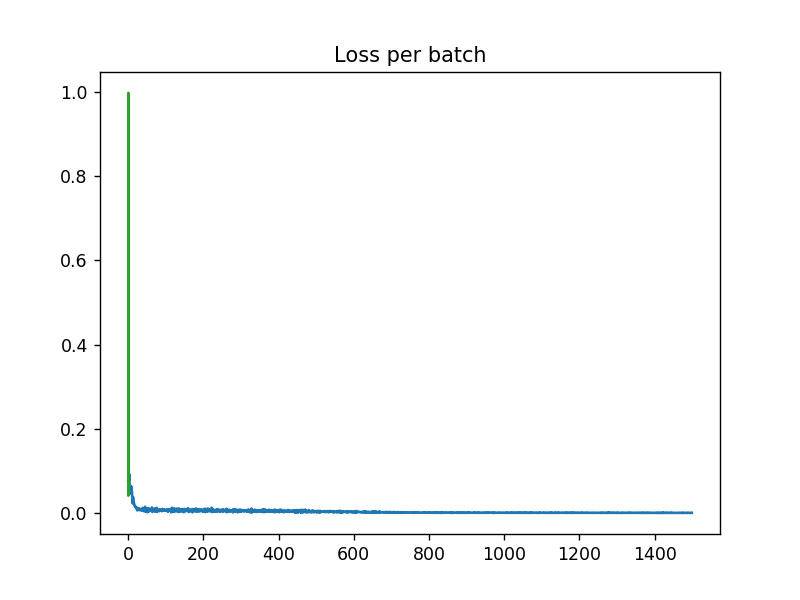

In [32]:
model = init_model()
history = LossHistory()
# when training, using minibatch seems to be pretty good
model.fit(train_x, train_y, epochs=500, batch_size=10,
                callbacks=[history],
                validation_data=(test_x, test_y), verbose=2)
score = model.evaluate(test_x, test_y, batch_size=20)
print(score)
plot_losses(history.losses)

### Evaluation

In [33]:
print("Training data accuracy")
for i in range(len(train_x)):
    print("True R_norm: " + str(train_y[i]) + "\tPredicted R_norm: " + str(model.predict(np.reshape(train_x[i], (1, 50)))))

Training data accuracy
True R_norm: [0.18333333]	Predicted R_norm: [[0.19360492]]
True R_norm: [0.41666667]	Predicted R_norm: [[0.4160845]]
True R_norm: [0.25833333]	Predicted R_norm: [[0.25287646]]
True R_norm: [0.21666667]	Predicted R_norm: [[0.20613961]]
True R_norm: [0.10833333]	Predicted R_norm: [[0.14233458]]
True R_norm: [0.08333333]	Predicted R_norm: [[0.14209637]]
True R_norm: [0.31666667]	Predicted R_norm: [[0.32261008]]
True R_norm: [0.35833333]	Predicted R_norm: [[0.3580748]]
True R_norm: [0.19166667]	Predicted R_norm: [[0.17408627]]
True R_norm: [0.16666667]	Predicted R_norm: [[0.15599267]]
True R_norm: [0.23333333]	Predicted R_norm: [[0.20995325]]
True R_norm: [0.1]	Predicted R_norm: [[0.142209]]
True R_norm: [0.34166667]	Predicted R_norm: [[0.33680117]]
True R_norm: [0.30833333]	Predicted R_norm: [[0.3135315]]
True R_norm: [0.40833333]	Predicted R_norm: [[0.40939066]]
True R_norm: [0.25]	Predicted R_norm: [[0.22846074]]
True R_norm: [0.2]	Predicted R_norm: [[0.18388572]]

In [34]:
print("Testing data accuracy")
for i in range(len(test_x)):
    print("True R_norm: " + str(test_y[i]) + "\tPredicted R_norm: " + str(model.predict(np.reshape(test_x[i], (1, 50)))))

Testing data accuracy
True R_norm: [0.14166667]	Predicted R_norm: [[0.14566636]]
True R_norm: [0.15833333]	Predicted R_norm: [[0.15102638]]
True R_norm: [0.39166667]	Predicted R_norm: [[0.23870002]]
True R_norm: [0.4]	Predicted R_norm: [[0.34042662]]
True R_norm: [0.38333333]	Predicted R_norm: [[0.3288651]]
True R_norm: [0.125]	Predicted R_norm: [[0.14304718]]
True R_norm: [0.35]	Predicted R_norm: [[0.36850986]]
True R_norm: [0.28333333]	Predicted R_norm: [[0.30430016]]
True R_norm: [0.11666667]	Predicted R_norm: [[0.14256248]]
True R_norm: [0.225]	Predicted R_norm: [[0.17649087]]


## Test Result Evaluation

### High Radiu Cylinder

#### True Spectrum R_norm = 0.35   R = 210

In [ ]:
# extract x axis
x_axis = raw_data[:,1][0:50]
plt.plot(x_axis, train_x[14])

#### Predicted Spectrum R_norm = 0.238 R = 142.8

In [55]:
predicted = np.genfromtxt('C:/Users/jeffe/Desktop/Summer_research/S4_code/R_0.40939.txt')

predicted_transmittance = np.zeros((len(predicted), 1))
for i in range(len(predicted)):
    predicted_transmittance[i, 0] = predicted[i, 2]**2 + predicted[i, 3]**2
plt.plot(x_axis, predicted_transmittance)
plt.show()

#### Compare the spectrum (Blue->True Specturm Orange->Predicted Specturm)
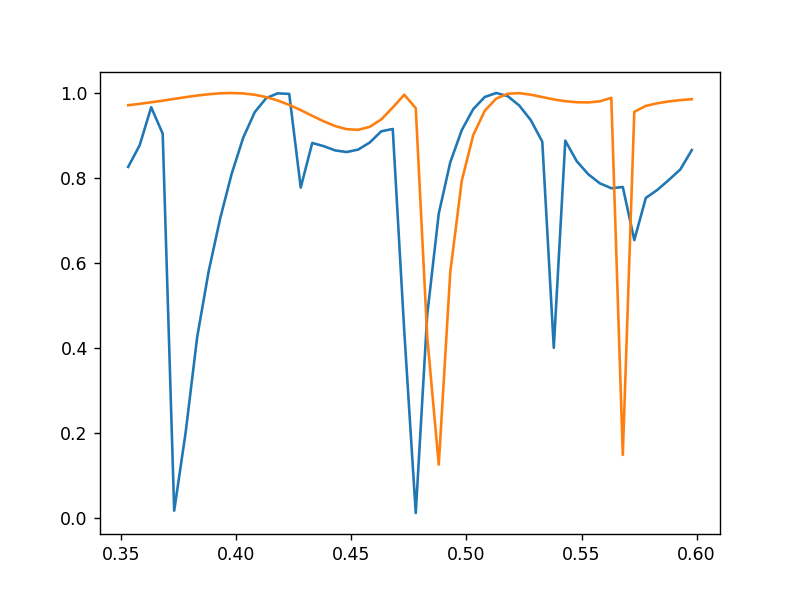

#### True R_norm = 0.4, Predicted R_norm = 0.3404266

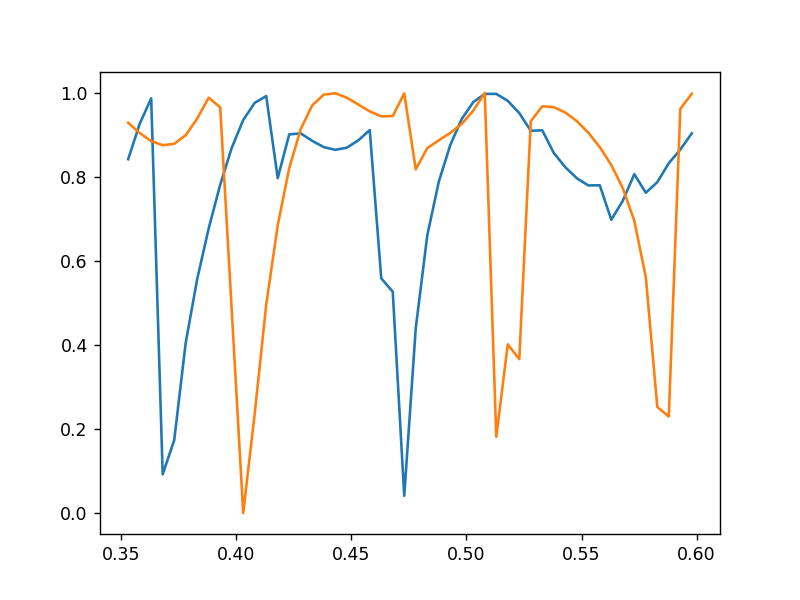

#### True R_norm = 0.3833, Predicted R_norm = 0.3288

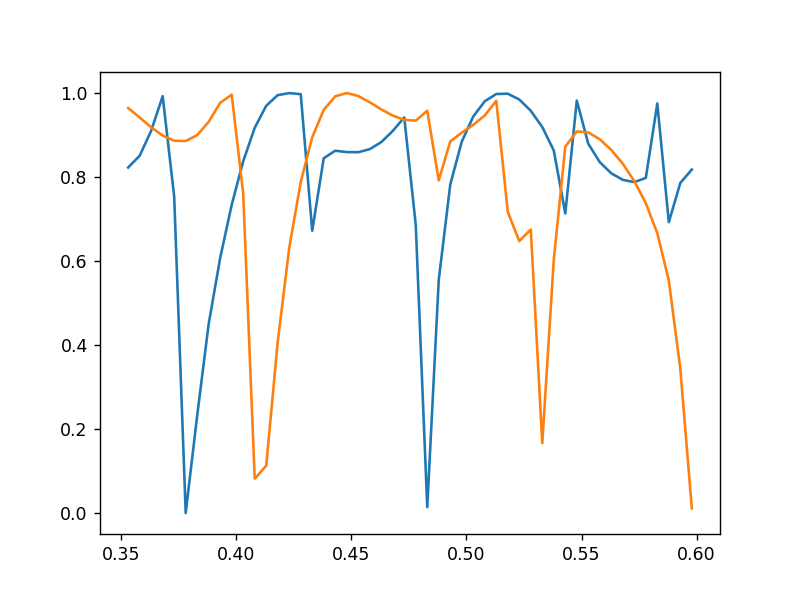

### Low Radius Spectrum Evaluation

#### True R_norm = 0.14167, Predicted R_norm = 0.14567

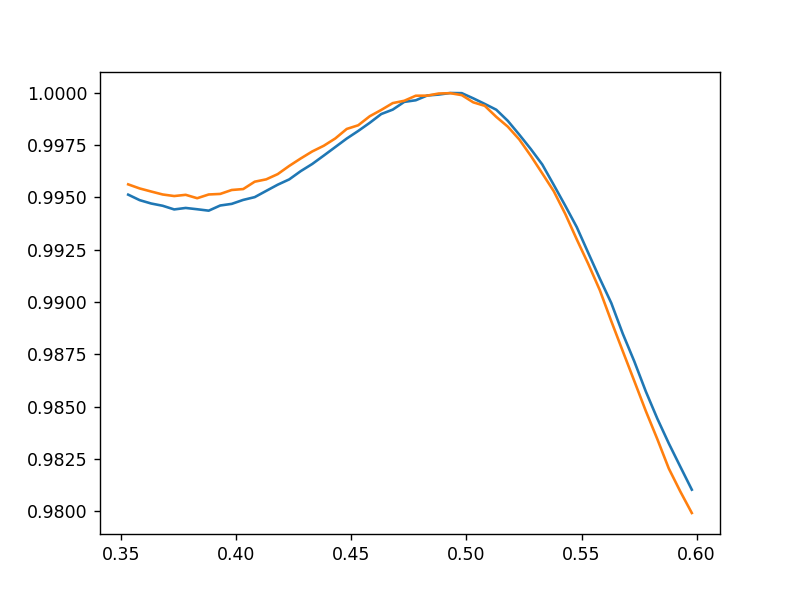

#### True R_norm = 0.225, Predicted R_norm = 0.17649

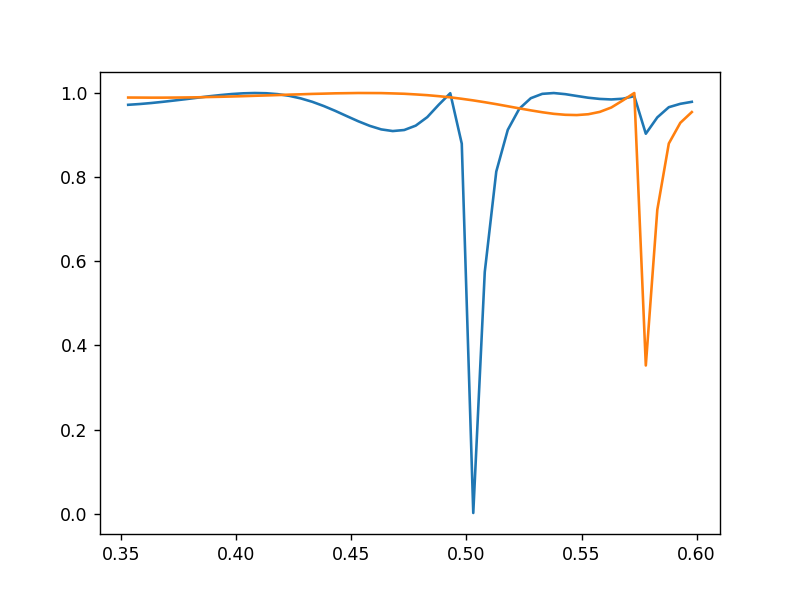

#### True R_norm = 0.125, Predicted R_norm = 0.1430

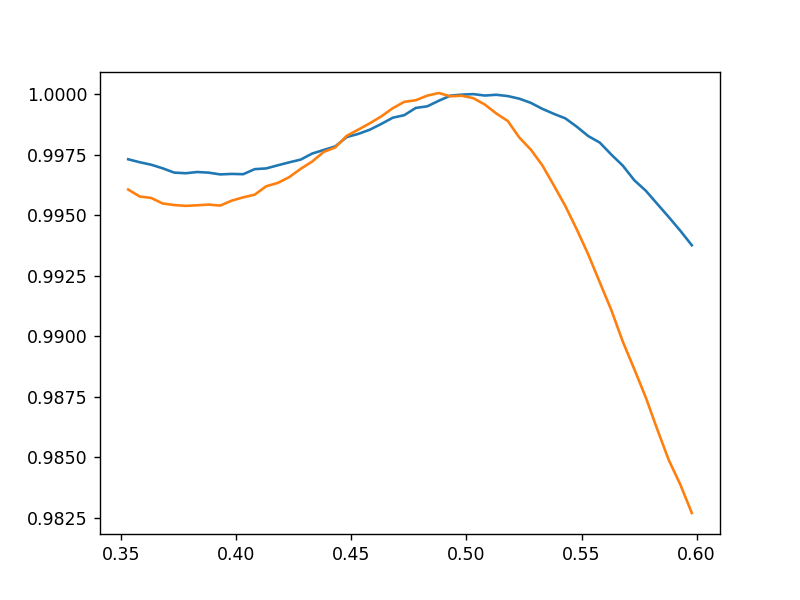

## Speculation

For low R_norm, to get a quite fit data, R_norm difference between True Value and Predicted Value must be around 0.018, which is 10 nm. Following is a good fit example of low R_norm. True R_norm = 0.14169, Predicted R_norm = 0.14567 
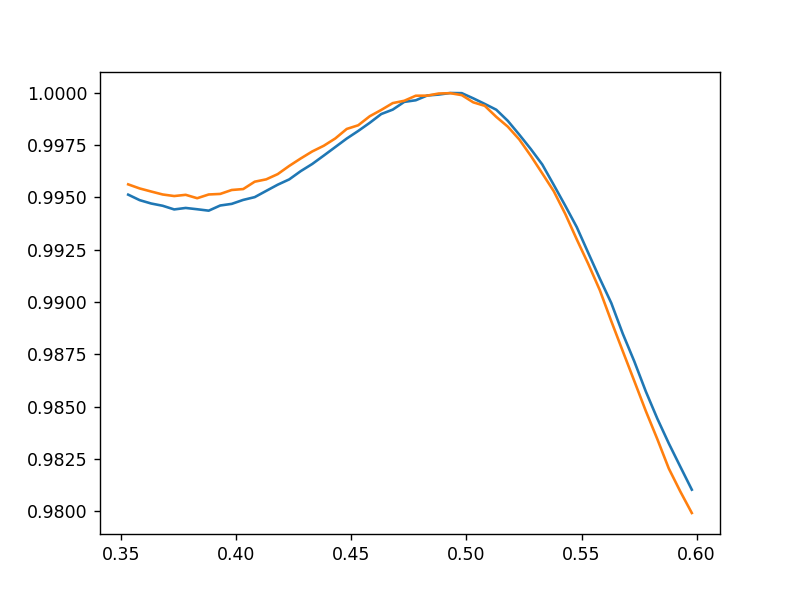

For high R_norm, to get a quite fit data, R_norm must be really small, around 0.001, R = 0.6
Following is a good fit example of high R_norm. True R_norm = 0.40833, Predicted R_norm = 0.4093
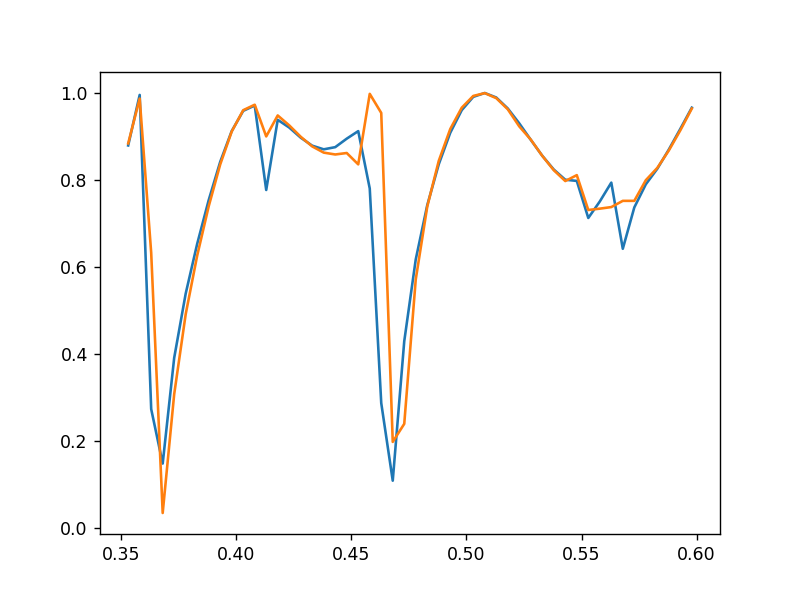

In [58]:
print("Percent of acceptable Training data: ")
count = 0
for i in range(len(train_x)):
    # let's say 0.006 is acceptable as difference of true and predicted value
    # of 0.005 produces a great prediction
    if abs(train_y[i] - model.predict(np.reshape(train_x[i], (1, 50)))) <= 0.006:
        count += 1
print(count / len(train_x))
print("Percent of acceptable Testing data: ")
count = 0
for i in range(len(test_x)):
    if abs(test_y[i] - model.predict(np.reshape(test_x[i], (1, 50)))) <= 0.006:
        count += 1
print(count / len(test_x))

Percent of acceptable Training data: 
0.43333333333333335
Percent of acceptable Testing data: 
0.2


With 41 data, we actually have a OK training result, and a not satisfying testing result. 

## Conclusion
### 1. We need more different kinds of graphs that cover different spectrum, because high radius may have complex spectrum that is quite unique compared others' in the dataset.
### 2. More precise spectrum information by truncating spectrums by smaller steps.
### 3. dropout technique harms result
### 4. Either wide NN or deep NN doesn't help right now. Shallow NN works better for now. If more data is given deep NN may outwieght shallow NN.
### 5. IMPORTANT!! Mean Square Error is not very great. Small loss doesn't imply high performance! (Have no idea how to solve this)

## So far the best model

In [ ]:
def init_model():
    model = Sequential()
    model.add(Dense(10, input_dim=dim))
    #model.add(Dropout(0.9))
    model.add(Activation('relu'))
    model.add(Dense(20))
    #model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr = 0.001),
              metrics=['accuracy'])
    return model

Train loss: 1.2397e-04 - acc: 0.0000e+00 - test loss: 0.0013 - val_acc: 0.0000e+00

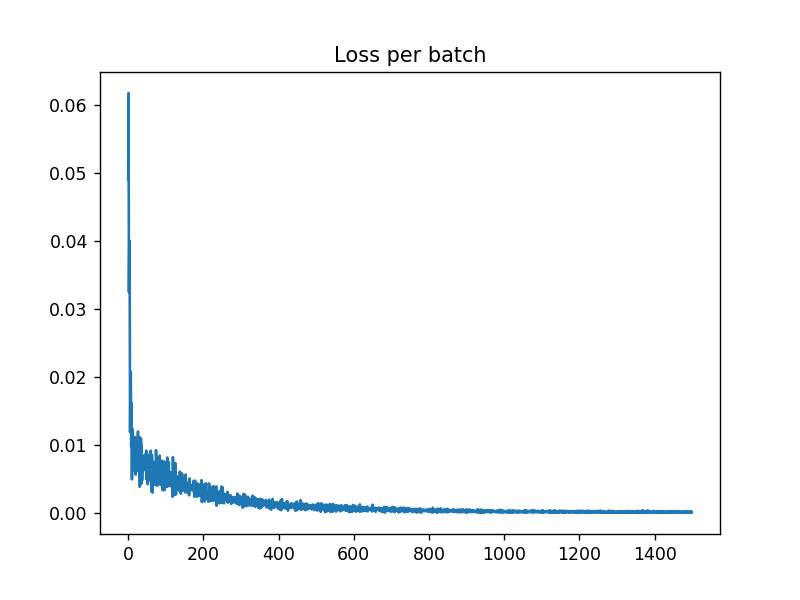